<a href="https://colab.research.google.com/github/MikelBros/LSTM_Tutorial/blob/master/univariate_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UNIVARIATE LSTM

The idea here is to learn a model to map obeservations from a subset of past observations, in order to predict to predict the next value in the sequence.

### The data

A sinus signal sampled at 100 equidistant values between 0 and 2pi

[0.95490224 0.97181157 0.98480775]


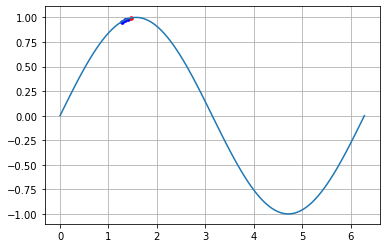

In [5]:
# univariate lstm example
import numpy as np
from sklearn import metrics
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

# Sample 100 equidistant values between 0 and 2pi
x = np.linspace(0, 2 * np.pi, 100)
raw_seq = np.sin(x)

raw_seq_ = raw_seq[20:23]
x_ = x[20:23]
print(raw_seq_)

plt.plot(x, raw_seq)
plt.scatter(x_, raw_seq_, color='blue', s=50, marker = '.')
plt.scatter(x[23], raw_seq[23], color='red', s=50, marker = '.')
plt.grid()



### Data packing

The data is then split in chunks of 3 consecutive values. The value following these three values is used as the target for this sequence

In [6]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

print('Train subset:', X[0], '\tTarget:', y[0])
print('Train subset:', X[1], '\tTarget:', y[1])

Train subset: [0.         0.06342392 0.12659245] 	Target: 0.18925124436041021
Train subset: [0.06342392 0.12659245 0.18925124] 	Target: 0.2511479871810792


In [7]:
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    #print('Root Mean Squared Log Error', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))


# split the sequence in a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2,shuffle=True)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, y_train, epochs=2000, verbose=0)

# check the accuracy of the model
yhat = model.predict(X_test, verbose=0)
print_accuracy_report(y_test, yhat)

Mean Absolute Error: 0.01097276488672452


[[-0.0112473]]


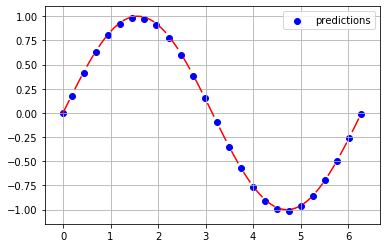

In [8]:
# demonstrate predictions
for i in range(0, 100, 4):
  x_t = x[i:i+n_steps]
  x_input = raw_seq[i:i+n_steps]
  plt.plot(x_t, x_input, color='red')
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  plt.scatter(x[i+n_steps], yhat, color='blue')

plt.scatter(0, 0, color='blue', label='predictions')

#plt.plot(x, raw_seq, color='red', label='original signal')
plt.grid()
plt.legend()

print(yhat)

In [0]:
# We stacked the data in the example before so we can reuse it. However,
# we need to define a new split function
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		#if len(sequences[i:end_ix, :-1]) <= n_steps_in:
		#	break
		#if len(sequences[end_ix:out_end_ix, -1]) <= n_steps_out:
		#	break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 3, 4
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

print(raw_seq_a[0:3])
print(raw_seq_b[0:3])
print(out_seq[0:(n_steps_in+n_steps_out)])
print(X.shape, y.shape)
print(X[0], y[0])
print(X[1], y[1])

[[-0.47942554]
 [-0.42280057]
 [-0.36447314]]
[[0.47942554]
 [0.53412003]
 [0.5866638 ]]
[[0.        ]
 [0.11131945]
 [0.22219066]
 [0.33216718]
 [0.44080619]
 [0.54767022]
 [0.65232898]]
(94, 3, 2) (94, 4)
[[-0.47942554  0.47942554]
 [-0.42280057  0.53412003]
 [-0.36447314  0.5866638 ]] [0.33216718 0.44080619 0.54767022 0.65232898]
[[-0.42280057  0.53412003]
 [-0.36447314  0.5866638 ]
 [-0.3046781   0.63684529]] [0.44080619 0.54767022 0.65232898 0.75436104]


In [0]:
# split the sequence in a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    test_size=0.2,
                                                    shuffle=True)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, y_train, epochs=2000, verbose=0)

# check the accuracy of the model
yhat = model.predict(X_test, verbose=0)
print_accuracy_report(y_test, yhat)

Mean Absolute Error: 0.0011541578998730386


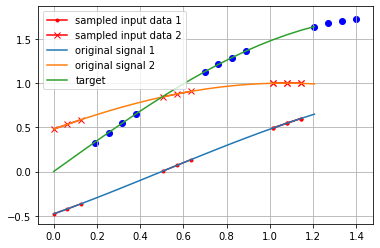

In [0]:
max_ = 20

# demonstrate predictions
for i in range(0, max_, (n_steps_in+n_steps_out+1)):
  # Notice that the training was peformed on data between [0, 2pi)!
  # The model has learned non-linear transform between the shifted sinus 
  # functions to a third sinus wave
  x = np.linspace(0 * np.pi, 2 * np.pi, 100)
  x_t = x[i:i+n_steps_in]
  #print(len(x_t))
  input_a = raw_seq_a[i:i+n_steps_in]
  input_b = raw_seq_b[i:i+n_steps_in]
  input_ = hstack((input_a, input_b))
  plt.plot(x_t, input_a, color='red', marker = '.')
  plt.plot(x_t, input_b, color='red', marker = 'x')
  input_ = input_.reshape((1, n_steps_in, n_features))
  yhat = model.predict(input_, verbose=0)
  #print(yhat[0])
  #print(len(x[i+n_steps_in:i+n_steps_in+4]))
  if len(x[(i+n_steps_in):(i+n_steps_in+n_steps_out)]) == n_steps_out:
    plt.scatter(x[(i+n_steps_in):(i+n_steps_in+n_steps_out)], 
                yhat[0], 
                color='blue')
  else:
    pass
    
  
#plt.scatter(x[i+n_steps_in:i+n_steps_in+4], yhat, color='blue', label='predictions')
plt.plot(x_t, input_a, color='red', marker = '.', label='sampled input data 1')
plt.plot(x_t, input_b, color='red', marker = 'x', label='sampled input data 2')
plt.plot(x[0:max_], raw_seq_a[0:max_], label='original signal 1')
plt.plot(x[0:max_], raw_seq_b[0:max_], label='original signal 2')
plt.plot(x[0:max_], out_seq[0:max_], label='target')

plt.grid()
plt.legend()